In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
df = pd.read_csv(r"C:\Users\harsh\Downloads\house_prediction_dataset\Housing.csv") 
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [13]:
df.isnull().sum()
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [17]:
# Converting categorical columns using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Verifying all columns are numeric now
df_encoded.dtypes

price                              int64
area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
parking                            int64
mainroad_yes                        bool
guestroom_yes                       bool
basement_yes                        bool
hotwaterheating_yes                 bool
airconditioning_yes                 bool
prefarea_yes                        bool
furnishingstatus_semi-furnished     bool
furnishingstatus_unfurnished        bool
dtype: object

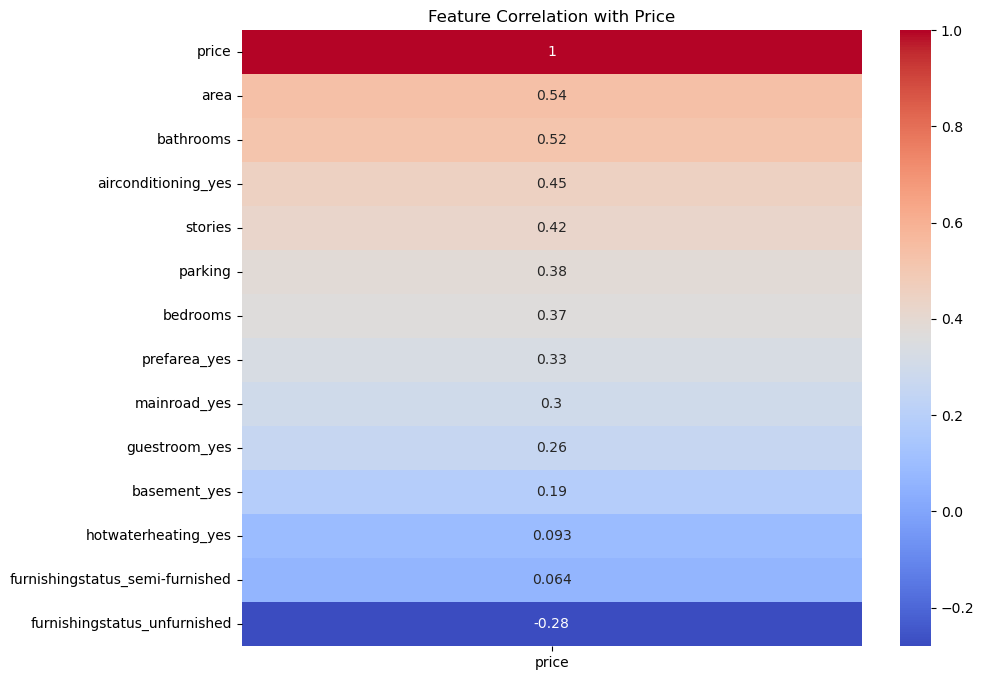

In [19]:
# Visualizing correlation with target variable
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr()[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Price')
plt.show()


In [21]:
# Simple Linear Regression - Using only 'area'
X_simple = df_encoded[['area']]
y = df_encoded['price']

# Multiple Linear Regression - Using all features except target
X_multiple = df_encoded.drop('price', axis=1)
y_multiple = df_encoded['price']

In [23]:
# Simple
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Multiple
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=42)

In [25]:
# Simple Linear Regression
model_s = LinearRegression()
model_s.fit(X_train_s, y_train_s)

# Multiple Linear Regression
model_m = LinearRegression()
model_m.fit(X_train_m, y_train_m)

LinearRegression()

In [27]:
# Predictions
y_pred_s = model_s.predict(X_test_s)
y_pred_m = model_m.predict(X_test_m)

# Simple Linear Regression Evaluation
print("🔹 Simple Linear Regression")
print("MAE:", mean_absolute_error(y_test_s, y_pred_s))
print("MSE:", mean_squared_error(y_test_s, y_pred_s))
print("RMSE:", np.sqrt(mean_squared_error(y_test_s, y_pred_s)))
print("R²:", r2_score(y_test_s, y_pred_s))

# Multiple Linear Regression Evaluation
print("\n🔹 Multiple Linear Regression")
print("MAE:", mean_absolute_error(y_test_m, y_pred_m))
print("MSE:", mean_squared_error(y_test_m, y_pred_m))
print("RMSE:", np.sqrt(mean_squared_error(y_test_m, y_pred_m)))
print("R²:", r2_score(y_test_m, y_pred_m))

🔹 Simple Linear Regression
MAE: 1474748.1337969352
MSE: 3675286604768.185
RMSE: 1917103.7021424233
R²: 0.27287851871974644

🔹 Multiple Linear Regression
MAE: 970043.403920164
MSE: 1754318687330.6643
RMSE: 1324506.9600914388
R²: 0.6529242642153184


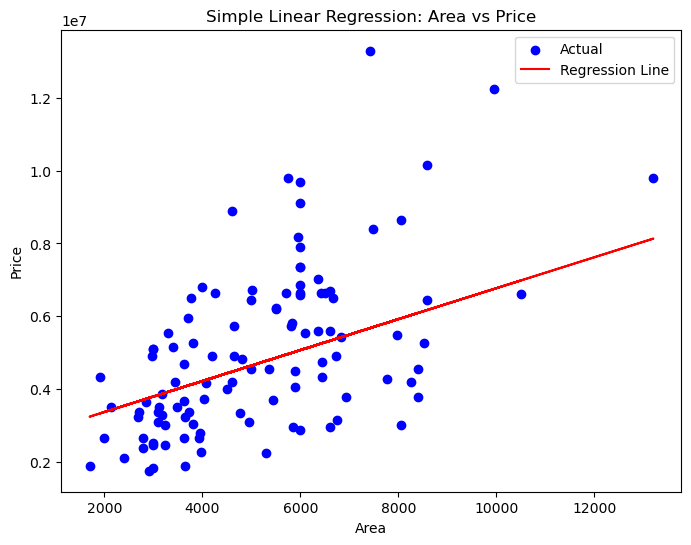

In [29]:
# Plotting regression line (Simple Regression)
plt.figure(figsize=(8,6))
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', label='Regression Line')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Area vs Price")
plt.legend()
plt.show()

In [31]:
# Simple Regression
print("Intercept:", model_s.intercept_)
print("Slope:", model_s.coef_[0])

# Multiple Regression
coef_df = pd.DataFrame({
    'Feature': X_multiple.columns,
    'Coefficient': model_m.coef_
})

print("\n🔍 Multiple Regression Coefficients:")
print(coef_df)

Intercept: 2512254.2639593435
Slope: 425.72984193878284

🔍 Multiple Regression Coefficients:
                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                           parking  2.248419e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
7                      basement_yes  3.902512e+05
8               hotwaterheating_yes  6.846499e+05
9               airconditioning_yes  7.914267e+05
10                     prefarea_yes  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05
